# Second version

In [13]:
import feature_selection_RL_V2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
#Data processing

datContent = [i.strip().split() for i in open("australian_data.dat").readlines()]
import csv
# write it as a new CSV file
with open("australian_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('australian_data.csv', sep=',', header=None)
australian_data.rename(columns={14: 'label'}, inplace=True)
X = australian_data.drop('label', axis=1)
y = australian_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [15]:
#Simulation
feature_number: int = 14

print('---------- AOR init ----------')
aor: list = [np.zeros(feature_number), np.zeros(feature_number)]
print(aor)

print('---------- Process init ----------')
feature_selection_process = feature_selection_RL_V2.FeatureSelectionProcessV2(feature_number, .05, .5, .99, aor, {})
print(feature_selection_process)

print('---------- The process has been successfully init ----------')

---------- AOR init ----------
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
---------- Process init ----------
FeatureSelectionProcessV2(nb_of_features=14, eps=0.05, alpha=0.5, gamma=0.99, aor=[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])], feature_structure={})
---------- The process has been successfully init ----------


In [16]:
nb_iter: int = 100
nb_explored: list = []
nb_not_explored: list = []
explored: int = 0
not_explored: int = 0

In [17]:
for it in range(nb_iter):

    print(f'Current state selection {it} ---------')
    current_state = feature_selection_process.start_from_empty_set()
    
    while current_state.number[0] <= 13:

        #We get the reward of the state
        if current_state.reward == 0:
            current_state.get_reward(X_train, y_train, X_test, y_test)

        #We chose the next state
        return_next_action_state = current_state.select_action(feature_selection_process.feature_structure, feature_selection_process.eps, feature_selection_process.aor)
        next_state, next_action = return_next_action_state[1], return_next_action_state[0]

        current_state.nb_visited += 1

        if current_state.v_value == 0:
            explored += 1
            print(explored)
        else:
            not_explored += 1

        if len(next_action.state_next.description) >= 14:
            break

        #We update the v_value of the state
        current_state.update_v_value(feature_selection_process.alpha, feature_selection_process.gamma, next_state.v_value)

        #We update the aor table
        feature_selection_process.aor = next_action.get_aorf(feature_selection_process.aor)

        #Add the state to the research tree
        feature_selection_process.add_to_historic(current_state)

        current_state = next_state
        
    nb_explored.append(explored)
    nb_not_explored.append(not_explored)

results = feature_selection_process.get_final_aor_sorted()

Current state selection 0 ---------
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Current state selection 1 ---------
15
16
17
18
19
Current state selection 2 ---------
20
21
22
23
24
25
26
27
28
29
30
Current state selection 3 ---------
Current state selection 4 ---------
Current state selection 5 ---------
Current state selection 6 ---------
Current state selection 7 ---------
Current state selection 8 ---------
31
32
33
Current state selection 9 ---------
34
Current state selection 10 ---------
35
36
37
Current state selection 11 ---------
Current state selection 12 ---------
38
39
40
41
42
43
44
45
46
47
48
49
Current state selection 13 ---------
50
51
Current state selection 14 ---------
Current state selection 15 ---------
Current state selection 16 ---------
52
Current state selection 17 ---------
53
54
55
56
57
58
59
60
61
62
63
64
Current state selection 18 ---------
65
66
67
68
69
70
71
72
73
Current state selection 19 ---------
Current state selection 20 ---------
74
75
76
77
78
79
80
81

In [18]:
feature_selection_process.feature_structure

{0: [State(number=[0, 0], description=[], v_value=40.75577921436829, reward=4.285087719298246, nb_visited=200)],
 1: [State(number=[1, 0], description=[11], v_value=41.12151841546472, reward=4.307017543859649, nb_visited=196),
  State(number=[1, 1], description=[13], v_value=2.1600877192982457, reward=4.3201754385964914, nb_visited=2),
  State(number=[1, 1], description=[3], v_value=2.1469298245614032, reward=4.2938596491228065, nb_visited=2)],
 2: [State(number=[2, 0], description=[7, 11], v_value=40.68026786970193, reward=4.2894736842105265, nb_visited=178),
  State(number=[2, 1], description=[0, 11], v_value=30.06135211831201, reward=4.267543859649122, nb_visited=14),
  State(number=[2, 1], description=[6, 11], v_value=2.1447368421052633, reward=4.2894736842105265, nb_visited=2),
  State(number=[2, 1], description=[4, 13], v_value=2.138157894736842, reward=4.276315789473684, nb_visited=2),
  State(number=[2, 2], description=[2, 3], v_value=2.1447368421052633, reward=4.28947368421052

In [19]:
feature_selection_process.get_optimal_state_value()

State(number=[1, 0], description=[11], v_value=41.12151841546472, reward=4.307017543859649, nb_visited=196)

In [20]:
feature_selection_process.aor

[array([ 99.,  94., 100.,  99.,  98.,  90.,  92., 100.,  94.,  36., 100.,
        100.,  32.,  98.]),
 array([16.79692381,  8.07280854,  9.35138755, 11.15477506, 12.57583361,
         3.64578586,  5.01854448, 18.75626267,  6.62928398,  2.1374813 ,
        15.04543535, 20.23038982,  1.2880255 , 14.03248698])]

In [43]:
results

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 array([ 99.,  94., 100.,  99.,  98.,  90.,  92., 100.,  94.,  36., 100.,
        100.,  32.,  98.]),
 (16.796923807288536,
  8.072808539360315,
  9.351387545557813,
  11.154775060974467,
  12.575833605546618,
  3.645785859354569,
  5.018544476703549,
  18.756262672309127,
  6.629283982594619,
  2.1374812983135434,
  15.045435352358618,
  20.230389823235406,
  1.2880255012127022,
  14.032486982493229),
 array([12,  9,  5,  6,  8,  1,  2,  3,  4, 13, 10,  0,  7, 11])]

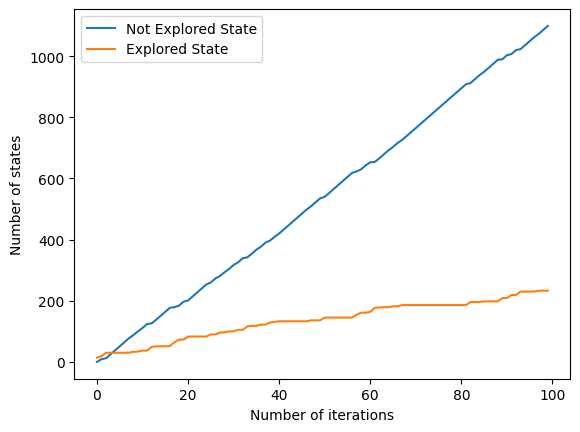

In [22]:
plt.plot([i for i in range(len(nb_not_explored))], nb_not_explored, label='Not Explored State')
plt.plot([i for i in range(len(nb_explored))], nb_explored, label='Explored State')
plt.xlabel('Number of iterations')
plt.ylabel('Number of states')
plt.legend(loc="upper left")

In [57]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

def compare_with_SVR() -> list:
    is_better_list: list = []

    for i in range(1, 14):
        #From RL
        clf = RandomForestClassifier(max_depth=4)
        clf.fit(X_train[results[-1][i:]], y_train)
        accuracy: float = clf.score(X_test[results[-1][i:]], y_test)

        #Benchmark
        estimator = RandomForestClassifier(max_depth=4)
        selector = RFE(estimator, n_features_to_select=i, step=1)
        selector = selector.fit(X_train, y_train)
        sele_acc = selector.score(X_test, y_test)

        if accuracy > sele_acc:
            is_better_list.append(1)
        else:
            is_better_list.append(0)

        print(f'with {i} variables {is_better_list}')

    return is_better_list

compare_with_SVR()

with 1 variables [1]
with 2 variables [1, 1]
with 3 variables [1, 1, 1]
with 4 variables [1, 1, 1, 0]
with 5 variables [1, 1, 1, 0, 0]
with 6 variables [1, 1, 1, 0, 0, 0]
with 7 variables [1, 1, 1, 0, 0, 0, 1]
with 8 variables [1, 1, 1, 0, 0, 0, 1, 0]
with 9 variables [1, 1, 1, 0, 0, 0, 1, 0, 1]
with 10 variables [1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
with 11 variables [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
with 12 variables [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
with 13 variables [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]


[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]